**Reference**: <https://seaborn.pydata.org/tutorial/regression.html>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes = True)

# Function to draw linear regression models

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


There are 2 functions:
- `sns.lmplot()` (*Axes-level function*: accept Series, dict, ...)
- `sns.regplot()` (*Figure-level function*: only accept long-form data)

Both function:
- Draw a scatter plot of `x` and `y`
- Daw a regression line by fitting a regression model `y ~ x`
- Fit 95% confidence interval

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

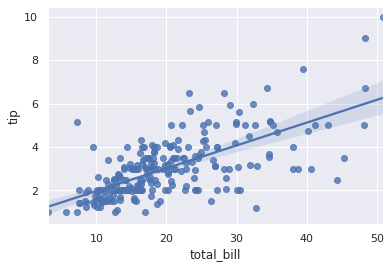

In [5]:
sns.regplot(data = tips, x = 'total_bill', y = 'tip')

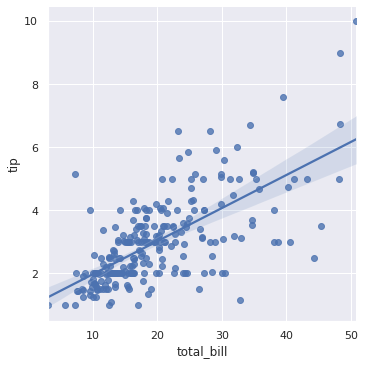

In [6]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip')

# Fitting different kinds of data

In [7]:
data = sns.load_dataset('anscombe')
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


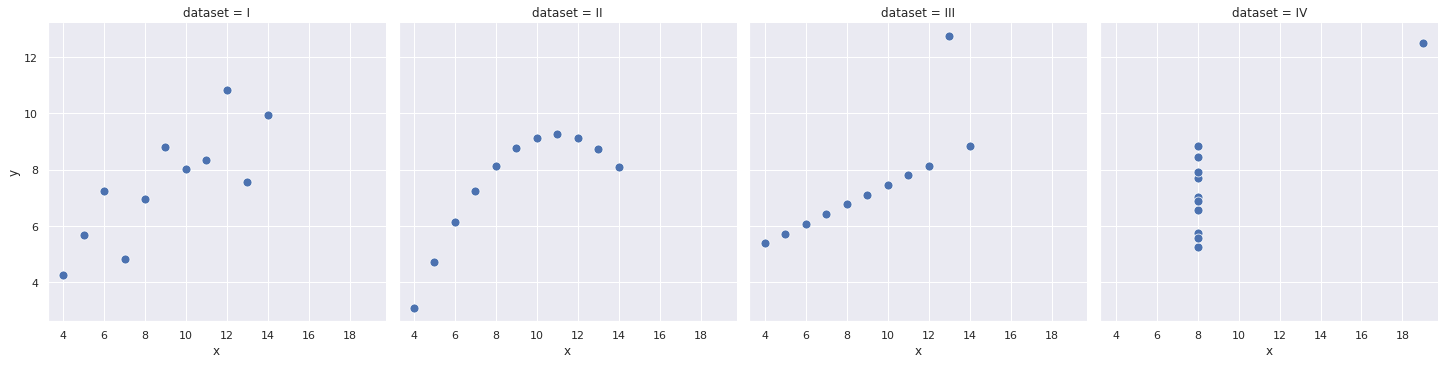

In [13]:
sns.relplot(data = data, x = 'x', y = 'y', col = 'dataset', s = 80)

In [19]:
set1 = data.query('dataset == "I"')
set2 = data.query('dataset == "II"')
set3 = data.query('dataset == "III"')

For the first case, the linear model is a good model

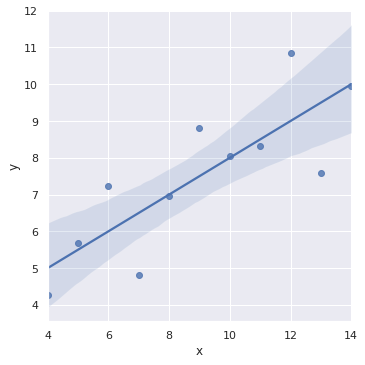

In [22]:
sns.lmplot(data = set1, x = 'x', y = 'y')

For the second, use second order polynomial model:

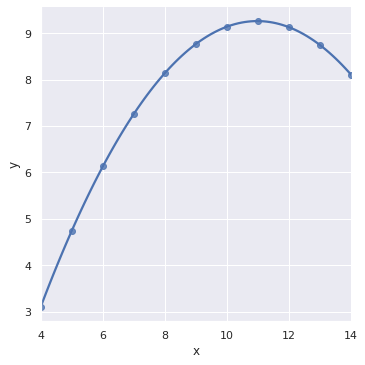

In [23]:
sns.lmplot(data = set2, x = 'x', y = 'y', order = 2)

For the third, use robust linear model to deal with outliers:

/home/trung/anaconda3/lib/python3.7/site-packages/statsmodels/robust/robust_linear_model.py:289: ConvergenceWarning: Estimated scale is 0.0 indicating that the most last iteration produced a perfect fit of the weighted data.
  'weighted data.', ConvergenceWarning)
/home/trung/anaconda3/lib/python3.7/site-packages/statsmodels/robust/robust_linear_model.py:289: ConvergenceWarning: Estimated scale is 0.0 indicating that the most last iteration produced a perfect fit of the weighted data.
  'weighted data.', ConvergenceWarning)
/home/trung/anaconda3/lib/python3.7/site-packages/statsmodels/robust/robust_linear_model.py:289: ConvergenceWarning: Estimated scale is 0.0 indicating that the most last iteration produced a perfect fit of the weighted data.
  'weighted data.', ConvergenceWarning)
/home/trung/anaconda3/lib/python3.7/site-packages/statsmodels/robust/robust_linear_model.py:289: ConvergenceWarning: Estimated scale is 0.0 indicating that the most last iteration produced a perfect fit of

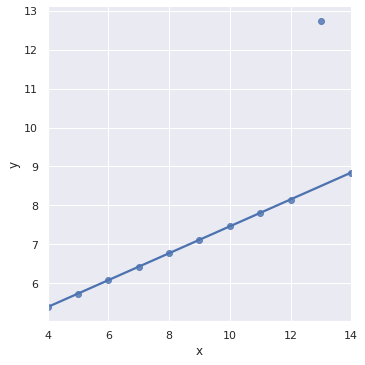

In [27]:
sns.lmplot(data = set3, x = 'x', y = 'y', robust = True, ci = False)

Use logistic regression when the `y` variable is binary

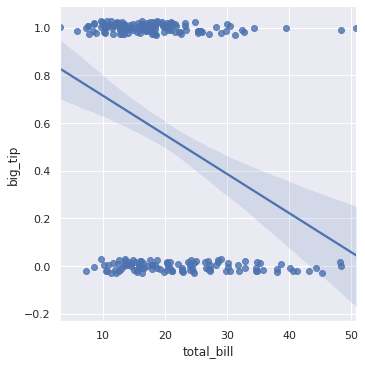

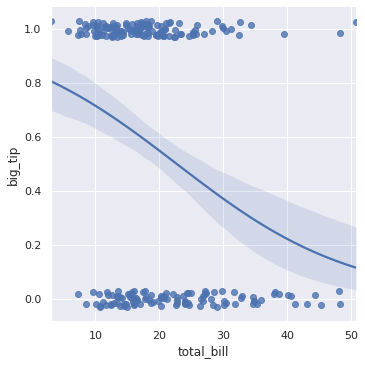

In [33]:

tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(data = tips, x = 'total_bill', y = 'big_tip', y_jitter = 0.03)
sns.lmplot(data = tips, x = 'total_bill', y = 'big_tip', y_jitter = 0.03, logistic = True)

An alternative approach, use **lowess smoother**

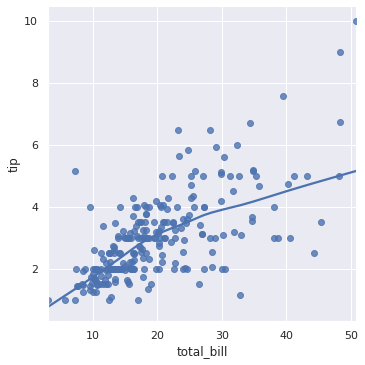

In [34]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', lowess = True)

check for the linear relationship by using residual plot, this helps us to decide whether a simple linear regression model is approriate for this dataset

<AxesSubplot:xlabel='x', ylabel='y'>

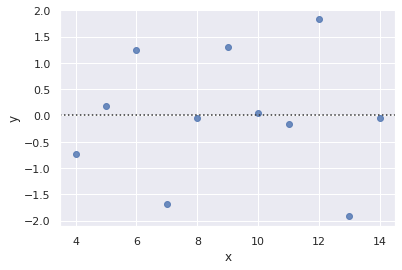

In [36]:
# random pattern, good
sns.residplot(data = set1, x = 'x', y = 'y')

<AxesSubplot:xlabel='x', ylabel='y'>

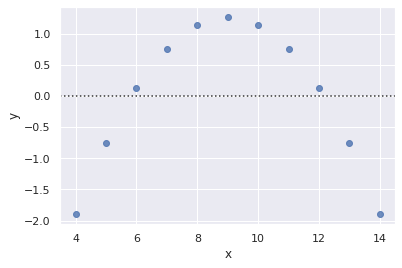

In [38]:
# not random pattern, bad
sns.residplot(data = set2, x = 'x', y = 'y')

# Conditioning on other variables

>how does the relationship between these two variables change as a function of a third variable?

The best way to separate out a relationship is to plot both levels on the same axes and to use color to distinguish them:

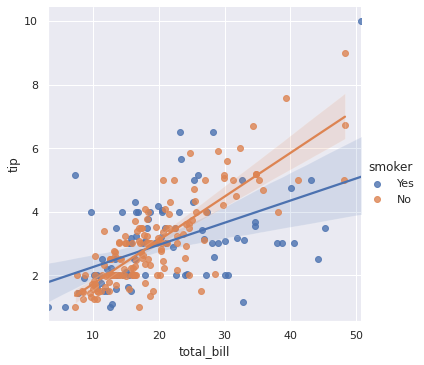

In [40]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', hue = 'smoker')

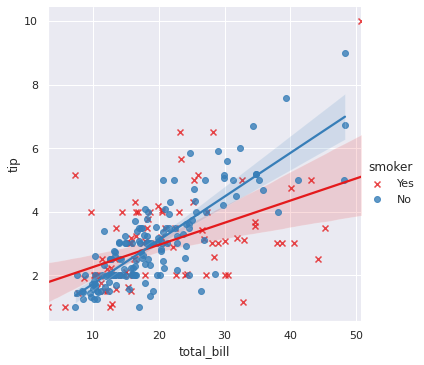

In [42]:
# customization
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', hue = 'smoker', markers = ['x', 'o'], palette = 'Set1')

Multiple Facet

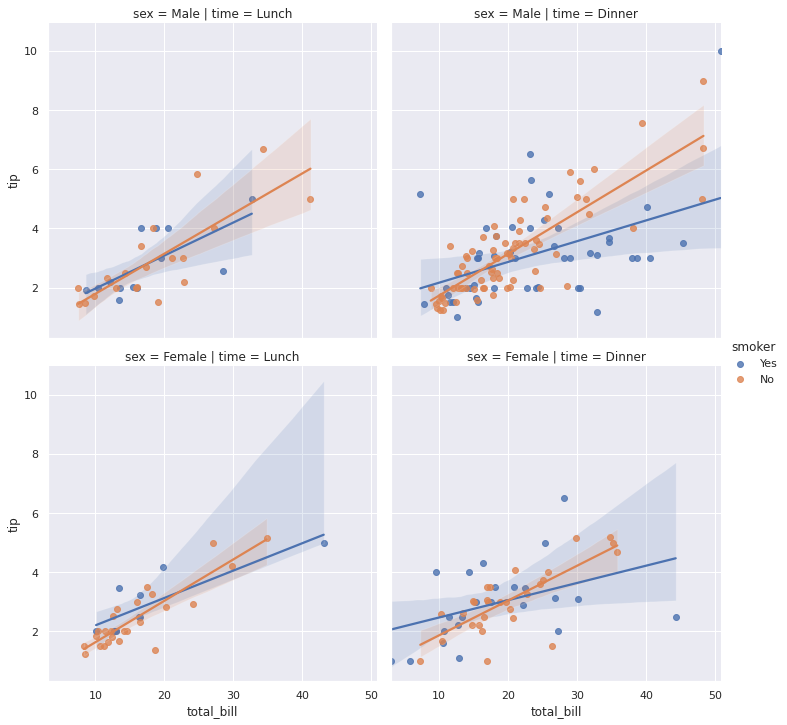

In [43]:
sns.lmplot(data = tips, x = 'total_bill', y = 'tip', hue = 'smoker', col = 'time', row = 'sex')

# Controlling the size and shape of the plot

**`regplot()`** is an Axes-level function draws onto a specific axes. This means that you can make multi-panel figures yourself and control exactly where the regression plot goes. If no axes object is explicitly provided, it simply uses the “currently active” axes, which is why the default plot has the same size and shape as most other matplotlib functions. To control the size, you need to create a figure object yourself.

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

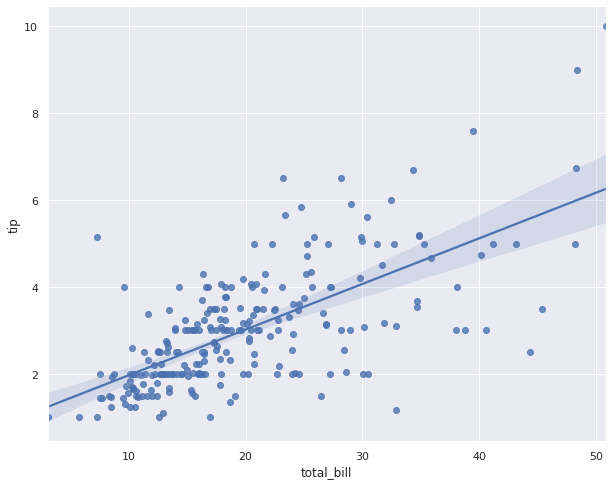

In [44]:
fig, ax = plt.subplots(figsize = (10, 8))
sns.regplot(data = tips, x = 'total_bill', y = 'tip', ax = ax)

In contrast, the size and shape of the **lmplot()** figure is controlled through the `FacetGrid` interface using the `height` and `aspect` parameters, which apply to **each facet** in the plot, not to the overall figure itself:



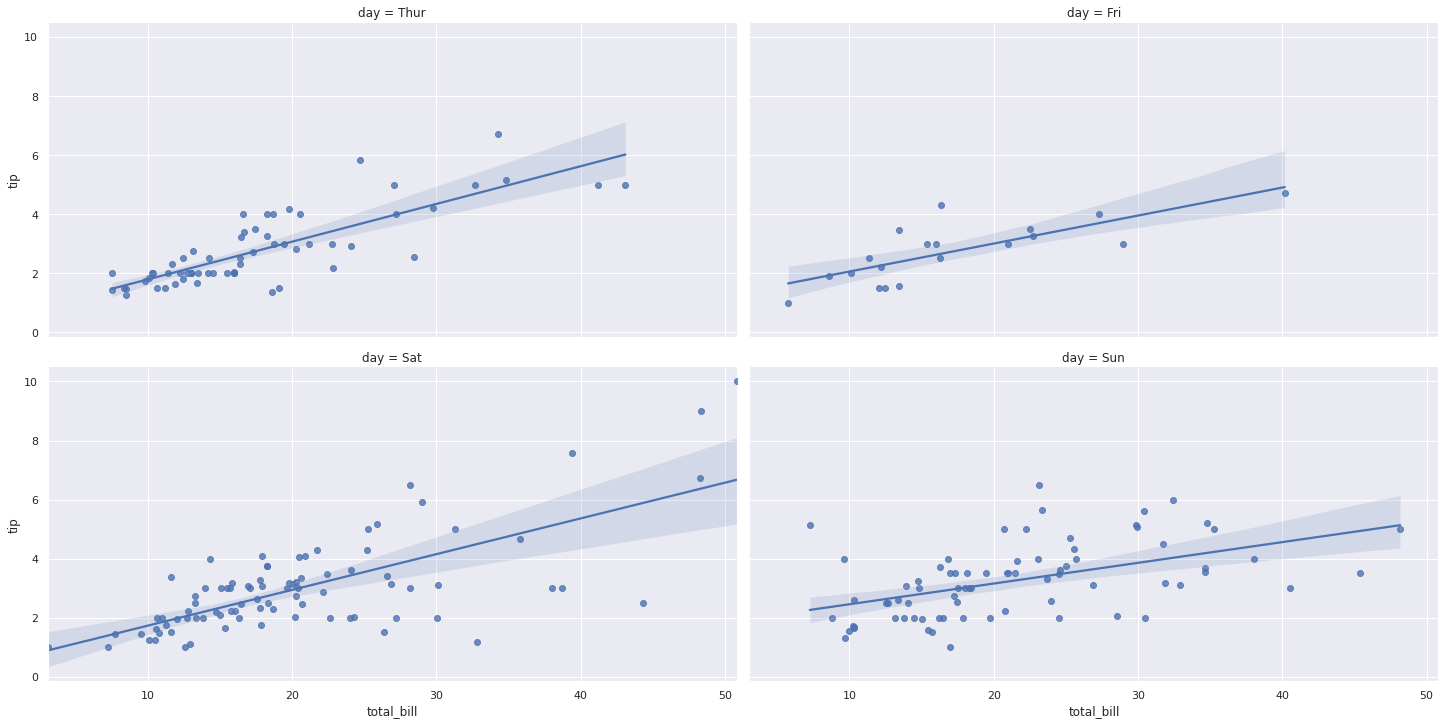

In [52]:
sns.lmplot(data = tips,x = 'total_bill', y = 'tip', col = 'day', col_wrap = 2, height = 5, aspect = 2 / 1) # this this case, width = 10

# Plotting a regression in other context

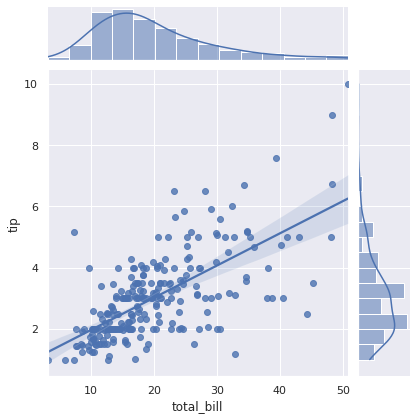

In [54]:
sns.jointplot(data = tips, x = 'total_bill', y = 'tip', kind = 'reg')

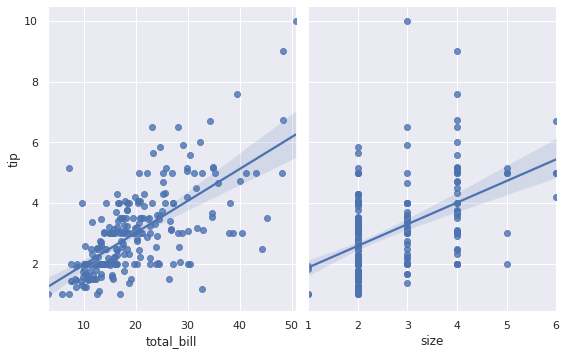

In [55]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg");


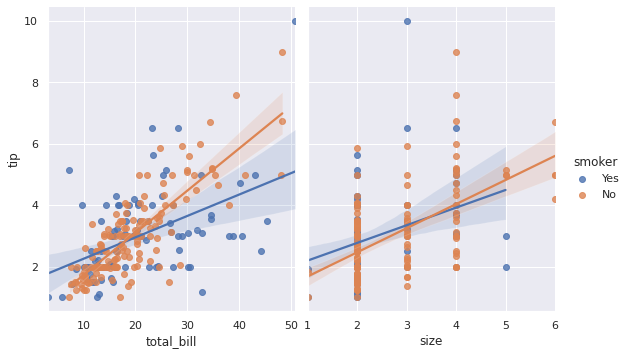

In [60]:
sns.pairplot(data = tips, x_vars = ['total_bill', 'size'], y_vars = 'tip', kind = 'reg', hue = 'smoker', height = 5, aspect = .8)

# Tips and Tricks

Because the confidence interval is calculated from bootstrapping, so when the size of the dataset is large, this can be computationally expensive, it is better off to turn off calculating confidence interval by setting **`ci = False`**